# Chapter 2

In [1]:
import os
import pandas as pd
from dataclasses import dataclass

@dataclass
class PSET:
    awd: str = os.getenv('AWD')
    
pset = PSET()
pset

PSET(awd='/Users/rwk/Development/training/intro_linear_regression_analysis')

## Example 2.1

In [2]:
e2p1_df = pd.read_excel(f'{pset.awd}/data/chapter_2/Examples/data-ex-2-1 (Rocket Prop).xls')
e2p1_df

,"Observation, i","Shear Strength, yi (psi)","Age of Propellant, xi (weeks)"
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50
5,6,1708.30,19.00
6,7,1784.70,24.00
7,8,2575.00,2.50
8,9,2357.90,7.50
9,10,2256.70,11.00


In [3]:
e2p1_df.rename(columns={
    'Observation, i'                : 'n',
    'Shear Strength, yi (psi)'      : 'strength',
    'Age of Propellant, xi (weeks)' : 'age',
}, inplace=True)
e2p1_df.head()

,n,strength,age
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50


<AxesSubplot: xlabel='age', ylabel='strength'>

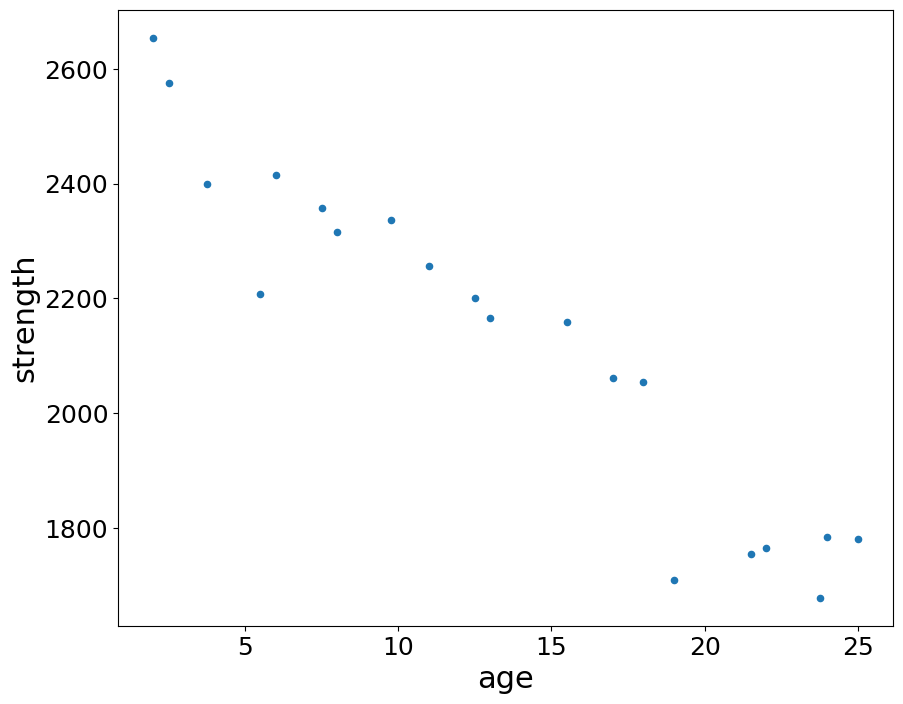

In [4]:
e2p1_df.plot.scatter(x='age', y='strength')

In [5]:
x = e2p1_df.age.values.reshape(-1, 1)
y = e2p1_df.strength.values.reshape(-1, 1)
x, y

(array([[15.5 ],
        [23.75],
        [ 8.  ],
        [17.  ],
        [ 5.5 ],
        [19.  ],
        [24.  ],
        [ 2.5 ],
        [ 7.5 ],
        [11.  ],
        [13.  ],
        [ 3.75],
        [25.  ],
        [ 9.75],
        [22.  ],
        [18.  ],
        [ 6.  ],
        [12.5 ],
        [ 2.  ],
        [21.5 ]]),
 array([[2158.7 ],
        [1678.15],
        [2316.  ],
        [2061.3 ],
        [2207.5 ],
        [1708.3 ],
        [1784.7 ],
        [2575.  ],
        [2357.9 ],
        [2256.7 ],
        [2165.2 ],
        [2399.55],
        [1779.8 ],
        [2336.75],
        [1765.3 ],
        [2053.5 ],
        [2414.4 ],
        [2200.5 ],
        [2654.2 ],
        [1753.7 ]]))

In [6]:
S_xx = ((x - x.mean())**2).sum()
S_xx

1106.559375

In [7]:
S_xy = (y*(x - x.mean())).sum()
S_xy

-41112.654375000035

In [8]:
beta1 = S_xy/S_xx
beta1

-37.15359094490527

In [9]:
beta0 = y.mean() - beta1*x.mean() 
beta0

2627.8223590012963

In [10]:
result_df = e2p1_df.copy()
result_df['y']    = y 
result_df['x']    = x 
result_df['yhat'] = beta0 + beta1*x
result_df['e']    = result_df.y - result_df.yhat 
result_df

,n,strength,age,y,x,yhat,e
0,1,2158.70,15.50,2158.70,15.50,2051.941699,106.758301
1,2,1678.15,23.75,1678.15,23.75,1745.424574,-67.274574
2,3,2316.00,8.00,2316.00,8.00,2330.593631,-14.593631
3,4,2061.30,17.00,2061.30,17.00,1996.211313,65.088687
4,5,2207.50,5.50,2207.50,5.50,2423.477609,-215.977609
5,6,1708.30,19.00,1708.30,19.00,1921.904131,-213.604131
6,7,1784.70,24.00,1784.70,24.00,1736.136176,48.563824
7,8,2575.00,2.50,2575.00,2.50,2534.938382,40.061618
8,9,2357.90,7.50,2357.90,7.50,2349.170427,8.729573
9,10,2256.70,11.00,2256.70,11.00,2219.132859,37.567141


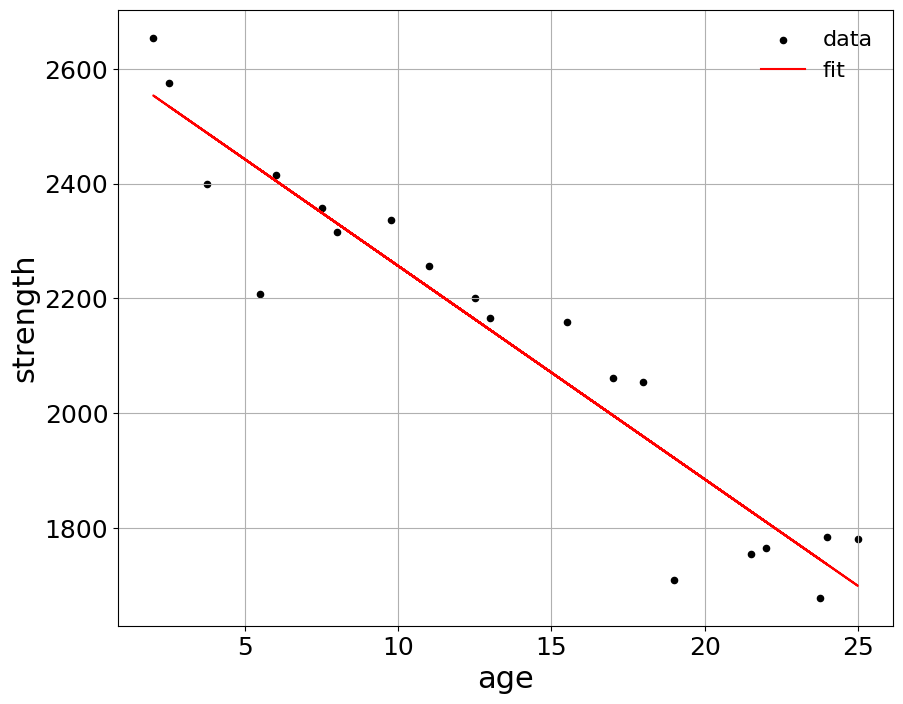

In [17]:
_, ax = plt.subplots()

result_df.plot.scatter(ax=ax, x='age', y='strength', color='k', label='data')
result_df.plot(ax=ax, x='age', y='yhat', color='r', label='fit')
ax.grid()
ax.legend(frameon=False)

In [18]:
import statsmodels.formula.api as smf

In [21]:
model = smf.ols(formula='strength ~ age', data=e2p1_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.64e-10
Time:                        14:05:27   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2627.8224     44.184     59.475      0.000    2534.995    2720.649
age          -37.1536      2.889    -12.860      0.000     -43.223     -31.084
==============================================================================
Omnibus:                        6.304   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.281
Skew:                          -1.109   Prob(JB):                        0.118
Kurtosis:                       3.464   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""